# 机器学习作业1--线性回归


## 单变量线性回归
### 题目：
预测一个新城市开设食品车的可行性；

### 已知数据：
根据以往经验，一辆食品车的盈利与该城市人口有关(单变量)，

相对应数据集合ex1data1.txt包含两列，第一列为人口（特征x），第二列为盈利（结果y）

### 问题：
拟合单变量的参数:y = ${\theta}_{0} + {\theta}_{1}*x$


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# 加载数据集
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population','Profit'])

In [9]:
data.head()  #打印前五行

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [10]:
data.describe()  #打印数据集统计特征

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


## 可视化观察数据特征
### x轴为population, y轴为Profit

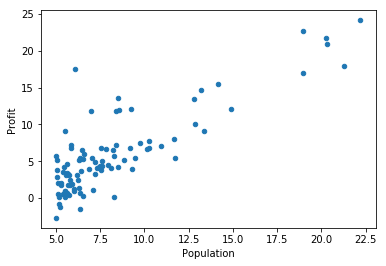

In [44]:
data.plot(kind='scatter',x='Population',y='Profit')
plt.savefig("data1.png")

### step1:创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\]   
ps: $x_{0} = 1$

In [12]:
def computeCost(X, y, theta):
    inner = np.power(((X*theta.T)-y),2) # 平方和实际计算了m次
    return np.sum(inner)/(2*len(X))

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

此处假设$x_{0}=1$

In [13]:
data.insert(0,'Ones',1)

In [14]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


从数据集中提取出数据，用来初始化变量

In [31]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1]   # X是所有行的，前cols-1列(去掉最后一列)
y = data.iloc[:,cols-1:cols]     #y是所有行，取最后一列

观察训练集(X),(目标集y)是否OK

In [32]:
X.head()


,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [33]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数使用的是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 还需要初始化theta。

In [34]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([1,1]))

查看数据维度

In [35]:
X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

代价函数的初始值为

In [36]:
computeCost(X,y,theta)

10.266520491383504

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$

$$\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right) = \frac{1}{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}}}{x}^{(i)}  ~~~~~~~~({x}^{0} = 1,1<=i <= m)$$

In [38]:
'''
param:
y:目标变量
X:训练集输入向量，
theta: 初始参数
alpha: 学习步长
iters: 学习迭代次数

return:
theta: 训练完的theta参数
cost: 训练过程的损失函数值
'''
def gradientDescent(X, y, theta, alpha, iters):
    temp_theta = np.matrix(np.zeros(theta.shape))   #与theta同形状, 保存theta临时值
    parameters = int(theta.ravel().shape[1])  #theta参数个数
    cost = np.zeros(iters)                    #初始化iters个0的矩阵
    theta_all = np.zeros((iters,parameters))
    
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp_theta[0,j] = theta[0,j] - ((alpha/len(X))*np.sum(term))
        
        theta = temp_theta
        theta_all[i] = np.array(temp_theta)  #此处调用矩阵，不会创建拷贝
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost,theta_all


初始化变量，alpha:学习率， iters:迭代次数
这里有个注意点：学习率不能取太大，否则很容易出现不能收敛问题

In [39]:
alpha = 0.02
iters =5000

运行梯度下降算法，求出拟合参数theta

In [40]:
g, cost, theta_all= gradientDescent(X, y, theta, alpha, iters)

In [41]:
g,cost,theta_all

(matrix([[-3.89578081,  1.19303364]]),
 array([8.12645203, 7.2286231 , 6.84681826, ..., 4.47697138, 4.47697138,
        4.47697138]),
 array([[ 0.9335867 ,  0.51530214],
        [ 0.94760242,  0.830569  ],
        [ 0.90988753,  0.63026924],
        ...,
        [-3.89578081,  1.19303364],
        [-3.89578081,  1.19303364],
        [-3.89578081,  1.19303364]]))

In [42]:
computeCost(X, y, g) # 代价函数的最小值

4.476971375975179

绘制线性模型以及数据，直观地观察拟合效果

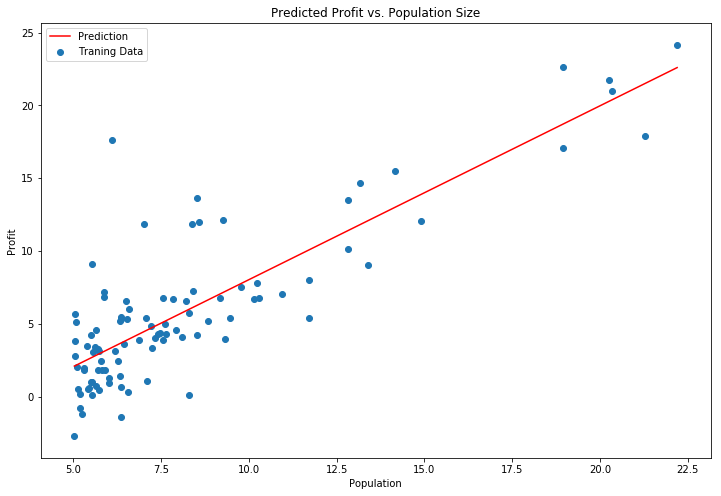

In [43]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

上面梯度下降计算过程，保留了每次迭代的损失函数值，
所以，可以绘制直观观察损失函数值变化趋势

 请注意，代价函数值应该总是降低的，否则就是学习率取值不合理
 

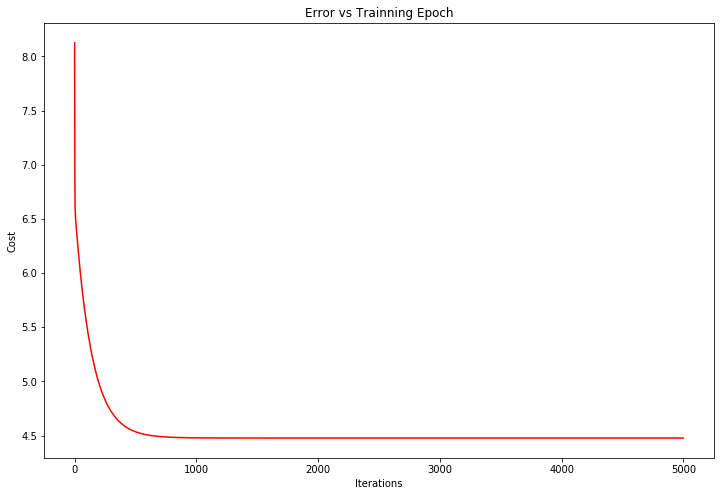

In [45]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Trainning Epoch')
plt.show()

由上图可以看出，迭代一千次以后，cost值就收敛了

为更直观理解梯度下降法求代价函数过程，绘制$J_{\theta}={\theta}_{0} + {\theta}_1 * x$等3D图和等高线图

In [46]:
X1 = theta_all[:,0]
Y1 = theta_all[:,1]
Z1 = cost

$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\]   
ps: $x_{0} = 1$

In [47]:
X1.ravel(),X.shape

(array([ 0.9335867 ,  0.94760242,  0.90988753, ..., -3.89578081,
        -3.89578081, -3.89578081]), (97, 2))

In [48]:
Y1

array([0.51530214, 0.830569  , 0.63026924, ..., 1.19303364, 1.19303364,
       1.19303364])

In [49]:
Z1

array([8.12645203, 7.2286231 , 6.84681826, ..., 4.47697138, 4.47697138,
       4.47697138])

In [50]:
X.shape


(97, 2)

In [51]:
X[0,1]
np.power((X[0,0]*1+X[0,1]*2-y[0]),2)
cost = cost/(2*len(X))

/home/leon/x86_install/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


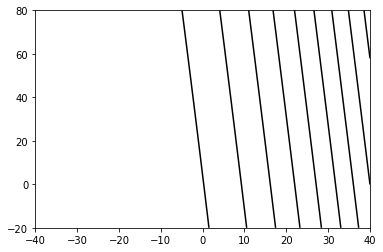

In [52]:
import matplotlib.pyplot as plt
import numpy as np
 
#定义x/y坐标
#x=np.linspace(-3,3,100)
#y = np.linspace(-3,3,100)
 
theta0_vals = np.linspace(-40, 40, 100)
theta1_vals = np.linspace(-20, 80, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i], theta1_vals[j]]).reshape((2, 1))
        J_vals[i, j] = computeCost(X, y, t.T)
    #J_vals = J_vals.T
#填充颜色
#X,Y,Height:点位置，以及对应的高度数据
#alpha: 0~1,alpha=0-->无色图  alpha=1-->深色
#plt.contourf(X,Y,Height,10,alpha=0.9,cmap=plt.cm.hot)
plt.contour(theta0_vals,theta1_vals,J_vals,10,colors='black',linewidth=0.5)

In [53]:
help(ax.plot_trisurf)

AttributeError: 'AxesSubplot' object has no attribute 'plot_trisurf'

# 多变量线性回归

练习1还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [54]:
path =  'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


对于此任务，我们添加了另一个预处理步骤 - 特征归一化。 这个对于pandas来说很简单

In [55]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [56]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 ,theta_all2= gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.130686480539042

可视化代价函数值迭代过程

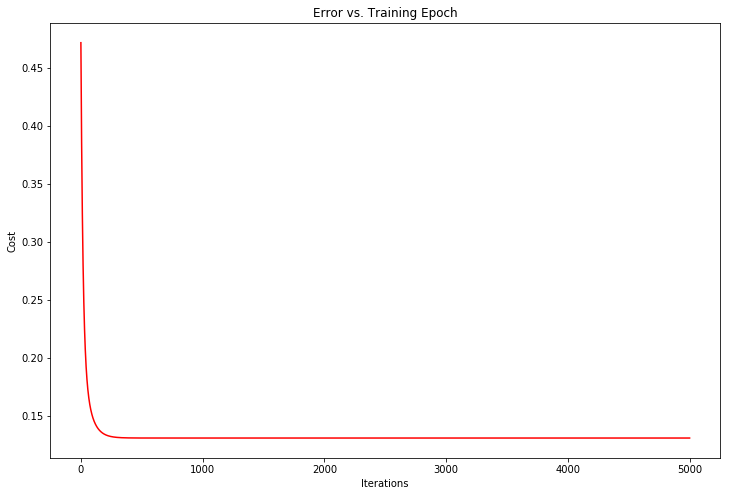

In [57]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

我们也可以使用scikit-learn的线性回归函数，而不是从头开始实现这些算法。 我们将scikit-learn的线性回归算法应用于第1部分的数据，并看看它的表现。

In [58]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

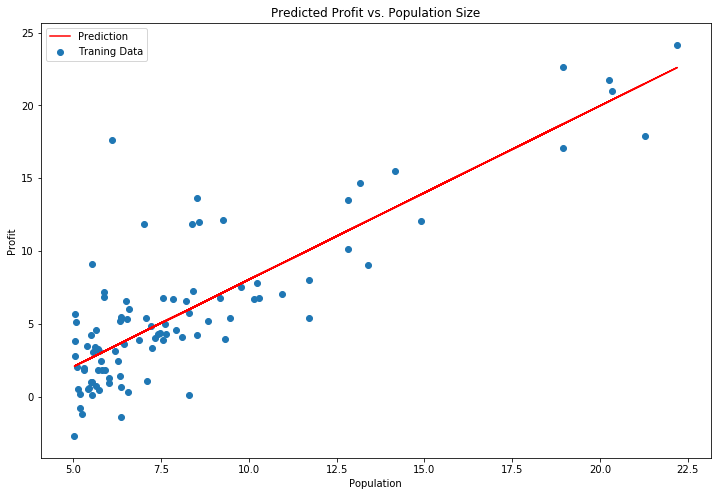

In [59]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

## 批量梯度下降注意问题
### 1.特征收缩：
即将特征尺度归一化，当我们面对多维特征的问题时，要保证这些特征具有相近的尺度，这可以帮助梯度下降法更快的收敛


<center>
<img src="./Feature_scaling.png" width="80%" height="80%" />
Feature scaling
</center>

### 2.学习率
梯度下降的每次迭代受学习率影响，学习率$\alpha$太小，则到手收敛所需迭代次数会非常高；

学习率$\alpha$过大，每次迭代可能不一定会减小代价函数，可能会越过局部最小值，导致无法收敛

<center>
<img src="./alpha.jpg" width="80%" height="80%" />
学习率$\alpha$
</center>

通常可以考虑尝试的学习率：

$\alpha = 0.01,0.03,0.3,1,3,10$

ps:参数按3倍替换调试

### 3.特征与多项式回归

线性回归并不适用所有数据，有时我们需要曲线来适应我们的数据，如下图

通常我们需要先观察数据，然后再决定准备尝试怎样的模型

<center>
<img src="./Feature_Polynomial.jpg" width="80%" height="80%" />
多项式回归
</center>



# 4. normal equation（正规方程）
正规方程是通过求解下面的矩阵方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

### 梯度下降与正规方程的比较：

<center>
<img src="./Normal_Equation3.jpg" width="80%" height="80%" />
</center>

梯度下降：

需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：

不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

正规方程不需要做特征缩放


<center>
<img src="./Normal_Equation.png" width="80%" height="80%" />
</center>


### 正规方程的不可逆：

正规方程求解公式： $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 

当${{\left( {{X}^{T}}X \right)}^{-1}}$ 不存在时，正规方程方法不可用，引起原因可能有

1.有可能造成${{\left( {{X}^{T}}X \right)}^{-1}}$ 成为奇异矩阵的无效数据存在；

2.特征数量大于训练样本容量

<center>
<img src="./Normal_Equation2.png" width="80%" height="80%" />
矩阵不可逆
</center>

### 解决办法：

1.观察数据，剔除无效数据(比如互为线性关系的)；

2.检查删除多余特征；



In [60]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [61]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])

#梯度下降得到的结果是matrix([[-3.24140214,  1.1272942 ]])

# tensorflow实现